### In this exercise we're gonna take sales data during black friday and help the stores predict or classify reasonable factors depending on the biodata of the users

### We'll first try to predict the purchase amount for each userid 

In [1]:
# importing the necessary packages
import numpy as np
import pandas as pd

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### We'll first import and have a look at the dataset to decide what kind of exploratory analysis to be performed on the dataset 

In [2]:
df = pd.read_csv('BlackFriday.csv', header = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


### We observed few null values in Product_category_2 and Product_category_3
### We'll see the percentage of missing values in each column and decide on a threshold on which we start dropping columns

In [4]:
# Percent missing values
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,
                            '% missing':perc_miss})

missing_data.sort_values(by='Total missing',
                         ascending=False).head(3)

,Total missing,% missing
Product_Category_3,373299,69.441029
Product_Category_2,166986,31.062713
User_ID,0,0.000000


### We can see that almost 70% of the missing value in the dataset comes from the column Product_category_3
### Hence we deicide to drop this column and proceed with filling the null points with appropriate values to the column Product_category_2's missing points

In [5]:
df = df.drop(['Product_Category_3'], axis = 1)

### We'll now see schema and the basic statistic of dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 45.1+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,23961.000000


### Parsing of the missing value depends on the type of algorithm that we're going to use. 
### We'll be using Random forest algorithm for this problem because its robust to missing values. But we'll parse the average value of the column to be filled in the missing points.

In [8]:
avg_prod_cat_2 = df['Product_Category_2'].mean()

df['Product_Category_2'].fillna(avg_prod_cat_2, inplace = True)

### We'll have another look at the dataset to make sure there's no major changes in the basic statistics of the dataset

In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4.223872,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,8.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.842144,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,23961.000000


### We're now good to move next step of the process.

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842144,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842144,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842144,7969


In [11]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

### Getting the data ready for predicting the Purchase cost of products
### We'll exclude the columns User_ID and Product_ID from our model building process as it doesn't contribute to the accuracy of the model.

### Selecting and converting the string columns to numerical encoding for model building

In [12]:
category_column =['Gender','Age','City_Category','Stay_In_Current_City_Years'] 

for col in category_column:
    df[col] = np.unique(df[col], return_inverse = True)[1]

In [13]:
train_cols = ['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2']

X = df[train_cols]
y = df.Purchase

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [14]:
modelregtree = DecisionTreeRegressor()
modelregtree.fit(X_train,y_train)

tuneparameters = [{ 'max_depth': [1,2,3,4,5,6,7,8,9,10],'min_samples_split': [2,3,4,5,6,7,8,9,10]}]

modeltree_2 = GridSearchCV(modelregtree, cv = 3 ,refit = 'true',param_grid = tuneparameters)
modeltree_2.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             pre_dispatch='2*n_jobs', refit='true', return_tr

In [15]:
ypred = modeltree_2.predict(X_test)

metrics.r2_score(y_test, ypred)

0.6372667517714117

### Building Random Forest model for regression

0.628246994594678
0.6317359652044428
0.6324470222852172
0.6326952676871339
0.6329156023166744


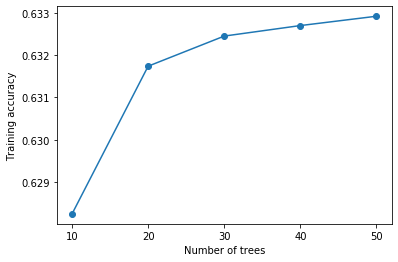

In [16]:
n_trees = [10, 20, 30, 40, 50]
test = []

for tree in n_trees:
    RF = RandomForestRegressor(n_estimators = tree, random_state = 0) 
    RF.fit(X_train, y_train)

    ypred = RF.predict(X_test)

    from sklearn import metrics
    acc = metrics.r2_score(y_test, ypred)
    print(acc)
    test.append(acc)
    
# Plotting the accuracy curve

plt.plot(n_trees, test, '-o')
plt.xlabel('Number of trees')
plt.ylabel('Training accuracy')
plt.xticks(n_trees)
plt.show()

### From here we can see that ideal number of trees are 20.
### we then proceed to fit a model with 20 trees.

In [17]:
RF = RandomForestRegressor(n_estimators = 20, random_state = 42, n_jobs = -1) 
RF.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

## Conclusion:
## With the help of Random Forest or Decision Tree Regressor we can predict the amount that well be spent my an individual with an accuracy of about 68%.

## Now procedding to second part of the problem ie. to predict/ classify the age group of the consumer

### First, we'll select the columns for this 

In [18]:
train_cols = ['Gender', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase']
X = df[train_cols]
y = df.Age

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 10, n_jobs = -1)
RFC.fit(X_train, y_train)
ypred = RFC.predict(X_test)
print (metrics.accuracy_score(y_test, ypred))
print (metrics.classification_report(y_test, ypred))

0.581290226570929
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1445
           1       0.61      0.62      0.62      9944
           2       0.63      0.66      0.65     21502
           3       0.52      0.50      0.51     10782
           4       0.46      0.44      0.45      4292
           5       0.44      0.39      0.41      3753
           6       0.50      0.46      0.48      2040

    accuracy                           0.58     53758
   macro avg       0.56      0.55      0.56     53758
weighted avg       0.58      0.58      0.58     53758



In [20]:
n_trees = [10, 20, 30, 40, 50,100,200]
test_c = []

for tree in n_trees:
    RFC1 = RandomForestClassifier(n_estimators = tree, random_state = 0) 
    RFC1.fit(X_train, y_train)

    ypred = RFC1.predict(X_test)

    from sklearn import metrics
    acc = metrics.accuracy_score(y_test, ypred)
    print(acc)
    test_c.append(acc)

0.5821087094013914
0.5831690167044905
0.5829085903493434
0.5821459131664124
0.5819970981063284
0.5817924773987128
0.5817924773987128


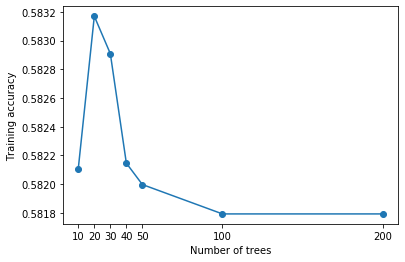

In [21]:
n_trees = [10, 20, 30, 40, 50,100,200]
plt.plot(n_trees, test_c, '-o')
plt.xlabel('Number of trees')
plt.ylabel('Training accuracy')
plt.xticks(n_trees)
plt.show()

## Conclusion:
## Even after increasing the number of trees in the algorithm we can see that the accuracy is almost the same. This concludes the that the age of a person doesn't depend on the type of product or even the rest of bio data we have of that user.